# Project 3 - Machine Learning with Reddit Posts
---

## Problem Statement

Over the years, the Android platform has grew with a large user base. Many users would browse forums such as Reddit to retrieve information regarding the latest updates and features released with its firmware. My instructor, being a huge Android fan, struggles to differentiate the posts from the Android Subreddit and Android Apps Subreddit. In hopes of aiding our instructor, we want to construct a model that properly distinguishes each forum post to their appropriate Subreddits.

---

## Executive Summary

Reddit has been part of the online community for many years. The amount of users that visit the forum and posts opinions are unimaginable. For this project we examine two subreddit(forums), Android and Android Apps. We want to build a model that can predict which post belongs to their appropriate forum with a decent amount of accuracy. Since accuracy along is not enough to determine a model's effectiveness, we will also utilize other classfication metrics such as sensitivity and specificity to properly evaluate that particular model.

Because we are dealing with texts, we cannot examine the data in a quanitifiable manner without performing some pre-processing work. We must first retrieve the forum posts from Reddit's json version of their Subreddit and extract the relevant information from the json data. Since Reddit caps our data pull at 1000 posts, we created a loop to ensure we stop the retrieval at the target value otherwise we would receive duplicate posts. Even after we obtain the posts, we still had to ensure none of the posts were indeed duplicates. As a precaution, we quickly converted the data into a dataframe of posts for their respective forums and saved them as a CSV file. This is crucial because we cannot always pull Reddit everytime we want to examine our data and since the forum is a live discussion, the forum posts will be different everytime we performed a data pull. We then proceed to our cleaning and EDA portion of the project.

We want to examine how the texts were compiled and if there were any formatting of text that were corrupted when we pulled the data. We also have to consider removing the punctuations within the data as well as setting everything word to lower case. In addition to all of the above cleaning, we also want to stem the words. Being a forum posts, there could be a lot of similar ways to refer to the same term and could inflate the features to have multiple words having the same root word. 

For our EDA, we want to examine the before and after cleaning of dataset and see if that had a substantial affect to the features and the frequency of words. We will have to use a CountVectorizer to transform the each word in the corpus into a feature and tally their frequency. This could tell which word or words would have a huge influence on the model in predicting the association of subreddits. We also looked at the bigrams (2 word terms) and see which combination were most frequently used. 

We finally proceed to our modeling process utilizing a variety of models and try to pick the best one out of the models chosen. For each model, we applied both the CountVectorizer variant and TFDIFVectorizer variant. Some models might perform better defpending on the transformer we apply but we will not know which model favors which transformers until the model is fitted. We wil examine the metrics as well as the ROC curve and perform an aggregate judgement on the model's performance and hopefully find a great predictor.

### Table of Contents

1. [Importing Modules and Various Modules](#Importing-Libraries-and-Various-Modules)
2. [Codes to Pull Data from Reddit](#Codes-to-Pull-Data-from-Reddit)
3. [Storing the Data](#Storing-the-Data)
4. [Importing File from Saved CSV](#Importing-File-from-Saved-CSV)
5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    1. [File Cleaning and Preparation](#File-Cleaning-and-Preparation)
    2. [Exploring the data](#Exploring-the-data)    
6. [Modeling Process](#Modeling-Process)
    1. [Logistic Regression Model With CountVectorizer](#Logistic-Regression-Model-With-CountVectorizer)
    2. [Logistic Regression Model With TFIDFVectorizer](#Logistic-Regression-Model-With-TFIDFVectorizer)
    3. [Multinomial Naive Bayes With CountVectorizer](#Multinomial-Naive-Bayes-With-CountVectorizer)
    4. [Multinomial Naive Bayes With TFIDFVectorizer](#Multinomial-Naive-Bayes-With-TFIDFVectorizer)
    5. [Random Forest with CountVectorizer](#Random-Forest-with-CountVectorizer)
    6. [Random Forest with CountVectorizer](#Random-Forest-with-TFIDFVectorizer)
    7. [XGBoost With CountVectorizer](#XGBoost-With-CountVectorizer)
    8. [XGBoost With TFIDForizer](#XGBoost-With-TFIDFVectorizer)
    9. [SVC with CountVectorizer](#SVC-with-CountVectorizer)
    10. [SVC with TFIDFVectorizer](#SVC-with-TFIDFVectorizer)
7. [Conclusion and Recommendations](#Conclusion-and-Recommendations)

### Importing Libraries and Various Modules

We import all the necessary libraries for our upcoming research and modeling methods.

In [1]:
import time
import requests
import numpy                                          as np
import pandas                                         as pd
import regex                                          as re
import matplotlib.pyplot                              as plt
from nltk.corpus                                      import stopwords
from nltk.stem.porter                                 import PorterStemmer
from sklearn.metrics                                  import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection                          import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model                             import LogisticRegression
from sklearn.feature_extraction.text                  import CountVectorizer, TfidfVectorizer
from sklearn.pipeline                                 import Pipeline
from sklearn.naive_bayes                              import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.tree                                     import DecisionTreeClassifier
from sklearn.ensemble                                 import RandomForestClassifier, AdaBoostClassifier
from sklearn.base                                     import TransformerMixin
from sklearn.svm                                      import SVC
import xgboost as xgb
import time
import                                                warnings
warnings.filterwarnings('ignore')

    
# we wanted to extend the width of the columns and increase the maximum number of rows because we felt it was easier to view
# a large amount of posts at a time
pd.set_option("display.max_colwidth", 200)
pd.set_option('display.max_rows', 200)

## Codes to Pull Data from Reddit

[Top](#Table-of-Contents)

The codes below are commented out to prevent accidental execution and overwriting the current data set

In [2]:
# user_agent = {'User-agent': 'Eddie'}

# url = 'https://www.reddit.com/r/Android.json'

# url_2 = 'https://www.reddit.com/r/androidapps.json'

The following loops will pull json data from their corresponding subreddits every 2 seconds. This is to prevent overloading the server and create a possible IP ban. The codes are commented out and not meant to be ran since the data were pulled. The code below was insipired by our instructor.

In [3]:
# vanilla_posts_android = []
# after = None
# count = 1

# while len(vanilla_posts_android) < 1000:
#     print(f'Pulling data {count} times.')
#     count += 1
#     if after == None:
#         new_url = url
#     else:
#         new_url = url + '?after=' + after
    
#     res = requests.get(new_url, headers = user_agent)
#     json_data = res.json() 
#     vanilla_posts_android.extend(json_data['data']['children'])
#     after = json_data['data']['after']
        
#     time.sleep(2)

In [4]:
# vanilla_posts_androidapps = []
# after_2 = None
# count = 1

# while len(vanilla_posts_androidapps) < 1000:
#     print(f'Pulling data {count} times.')
#     count += 1
#     if after_2 == None:
#         new_url = url_2
#     else:
#         new_url = url_2 + '?after=' + after_2
    
#     res = requests.get(new_url, headers = user_agent)
#     json_data = res.json() 
#     vanilla_posts_androidapps.extend(json_data['data']['children'])
#     after_2 = json_data['data']['after']
        
#     time.sleep(2)

### Storing the Data

[Top](#Table-of-Contents)

After pulling the data, we need to filter out the HTML formatting and retrieve only the posts. We create two empty lists to hold all the posts from their respective forums. We want to filter out the data we need (posts) and ignore the rest. After that, we want to remove duplicates if any, and check the ratio of data between the two to identify if there are any unbalanced representation. If the ratio is satisifactory, we proceed to transform the lists of data into a dataframe then set their indicators (flags) to the appropriate value for either the android or apps forum (1 for android and 0 for apps). We then concatenate the dataframes into 1 long dataset ready for export. Finally, we export the dataframe into a .csv file so that we can recall the dataset in the future for modeling.

In [5]:
# post_android = []
# post_apps = []

In [6]:
# for i in range(len(vanilla_posts_android)):
#     post_android.append(vanilla_posts_android[i]['data']['title'])

# for i in range(len(vanilla_posts_androidapps)):
#     post_apps.append(vanilla_posts_androidapps[i]['data']['title'])

We want to remove duplicate data(posts) that might be been pulled unintentionally but using the **set()** function then returning it back into a list.

In [7]:
# post_android = list(set(post_android))
# post_apps = list(set(post_apps))

# android = pd.DataFrame(post_android, columns = ['posts'])
# apps = pd.DataFrame(post_apps, columns = ['posts'])

Below is a representation of the amount of posts in their respective dataframes. The proportion of posts is not exactly even but we will conduct a baseline score below as a reference to compare with our model score.

In [8]:
# android.shape

In [9]:
# apps.shape

In [10]:
# android.to_csv('../data/android.csv')
# apps.to_csv('../data/apps.csv')

In [11]:
# android['subreddit_flag'] = 1
# apps['subreddit_flag'] = 0

In [12]:
# combined_df = pd.concat([android, apps], ignore_index = True)

In [13]:
# combined_df.to_csv('../data/combined_df.csv')

### Importing File from Saved CSV

[Top](#Table-of-Contents)

Importing the saved CSV that we performed above. As per above, we declare our flag for Android posts to be 1 and Android Apps posts to be 0. A baseline will be provided before the modeling process to get an idea what the distribution of data and benchmark for our models to reach. We will being the original data prior to the merge to show some exploratory analysis below seperately.

In [14]:
android_apps = pd.read_csv('../data/apps.csv')
android = pd.read_csv('../data/android.csv')
combined_df = pd.read_csv('../data/combined_df.csv')

In [15]:
combined_df.drop(columns = 'Unnamed: 0', inplace = True)
android_apps.drop(columns = 'Unnamed: 0', inplace = True)
android.drop(columns = 'Unnamed: 0', inplace = True)

### Exploratory Data Analysis

[Top](#Table-of-Contents)

#### File Cleaning and Preparation

[Top](#Table-of-Contents)

We want to remove all unnecessary symbols and punctuations as much as possible. 

In [16]:
for ix, sentences in combined_df['posts'].iteritems():
    combined_df.loc[ix, 'posts'] = re.sub('[^a-zA-Z\s]','', sentences)        
combined_df['posts'] = [words.lower() for words in combined_df['posts']]

# provided by the Jeremy
combined_df['posts'] = combined_df['posts'].apply(lambda x: ' '.join([PorterStemmer().stem(word) for word in x.split()]))

Creating a custom stop word list to remove unnecessary words that do not contribution to the model. Common words such as 'the', 'and', 'is, etc., are removed where particles and conjunctions might add features that might cause over fitting.

In [17]:
word_list = ['android', 'apps','psa', 'hackers keyboard', 'promo codes', 'flossy carter', 'app']
s_words = stopwords.words('english')
s_words.extend(word_list)

#### Exploring the data

[Top](#Table-of-Contents)

After formatting and cleaning the text with the appropriate pre-processing steps, we want to look at the baseline accuracy as well as the distribution of words or terms within the data

Below is a general look at the the frequency of occurence for each word below. We will examine single words, multiple word terms, and the presense of stop words when included with the data set. This should give us a general idea of how many unique words are terms and their distribution within the dataset.

In [18]:
cvec_with_stop_words = CountVectorizer()
cvec_without_stop_words = CountVectorizer(stop_words = s_words)
cvec_2_gram_with_stop_words = CountVectorizer(ngram_range=(2,2))
cvec_2_gram_without_stop_words = CountVectorizer(ngram_range=(2,2), stop_words = s_words)

We are creating a function here to streamline the creating of frequency plots

In [19]:
#defined values to plot a horizontal bar graph to show a tally of the top 10 words within the corpus
def plotting(series, title, xlabel, ylabel, filename):
    series.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', legend = '', figsize=(16,9)) 
    plt.title(title, size = 24)

    plt.xlabel(xlabel, size = 18) 
    plt.ylabel(ylabel, size =18)
    
    
    plt.xticks(size = 13)
    plt.yticks(size = 13)
    plt.tight_layout()
    
    plt.savefig(f'../graphs/{str(filename)}.png'); # saves the graph or chart as a png file

We will introduce the original dataframes of Android Apps and Android seperate to get a baseline of what the forum looks like. Because we are only examining the statistics, cleaning will not be performed on the two dataframes.

In [20]:
android.head()

,posts
0,What happens if a hypersurveillance approach to spying on workers becomes the norm?
1,SpaceX reports milestone for Starlink satellite links — and sparks a debate
2,The chief executive who built up one of the world’s leading mobile money services has died
3,July 2019 security patch is rolling out for Essential Phone
4,"How Amazon and the Cops Set Up an Elaborate Sting Operation That Accomplished Nothing. Behind-the-scenes emails show how Amazon and Ring worked with police in Aurora, Colorado to make people scare..."


In [21]:
android_apps.head()

,posts
0,++ whatsapp youtube or insta problems
1,Clean Master app and 'safety cloud'
2,Radio App - adfree
3,App that lets you use your phone as a game controller for a tablet
4,Best Reddit alternative that has the closest resemblance to the Official Reddit App


In [22]:
android_df_with_stop_words = cvec_with_stop_words.fit_transform(android['posts'])
android_frequency_with_stop_words = pd.DataFrame(android_df_with_stop_words.toarray(), 
                                         columns = cvec_with_stop_words.get_feature_names())
android_frequency_with_stop_words.sum().sort_values(ascending = False).head(10)

the        407
to         347
and        208
in         187
of         185
for        175
google     165
android    158
is         152
on         144
dtype: int64

In [23]:
android_apps_df_with_stop_words = cvec_with_stop_words.fit_transform(android_apps['posts'])
android_apps_frequency_with_stop_words = pd.DataFrame(android_apps_df_with_stop_words.toarray(), 
                                         columns = cvec_with_stop_words.get_feature_names())
android_apps_frequency_with_stop_words.sum().sort_values(ascending = False).head(10)

app     431
to      275
for     218
the     172
that    137
is      132
and     124
with    116
an      110
on       93
dtype: int64

As shown above, the stop words definitely muddle the examination of most frequent words for their respective posts. We will need to remove the stop words or common words in order to get a better view of what words do each forums use the most.

In [24]:
android_df_without_stop_words = cvec_without_stop_words.fit_transform(android['posts'])
android_frequency_without_stop_words = pd.DataFrame(android_df_without_stop_words.toarray(), 
                                         columns = cvec_without_stop_words.get_feature_names())
android_frequency_without_stop_words.sum().sort_values(ascending = False).head(10)

google      165
new          66
phone        61
galaxy       59
samsung      55
pixel        52
pro          50
facebook     45
huawei       45
review       43
dtype: int64

In [25]:
android_apps_df_without_stop_words = cvec_without_stop_words.fit_transform(android_apps['posts'])
android_apps_frequency_with_stop_words = pd.DataFrame(android_apps_df_without_stop_words.toarray(), 
                                         columns = cvec_without_stop_words.get_feature_names())
android_apps_frequency_with_stop_words.sum().sort_values(ascending = False).head(10)

looking        73
google         60
best           59
dev            49
phone          42
new            38
like           33
help           30
alternative    28
launcher       28
dtype: int64

We see some words that indicate how the Android forum will use words associate with branding while the Android Apps forum will have users seeking aid or disucssing development of apps. Google will be common between the two since both topics are related to that company. Below is a visualization for the tally of words used in each forum.

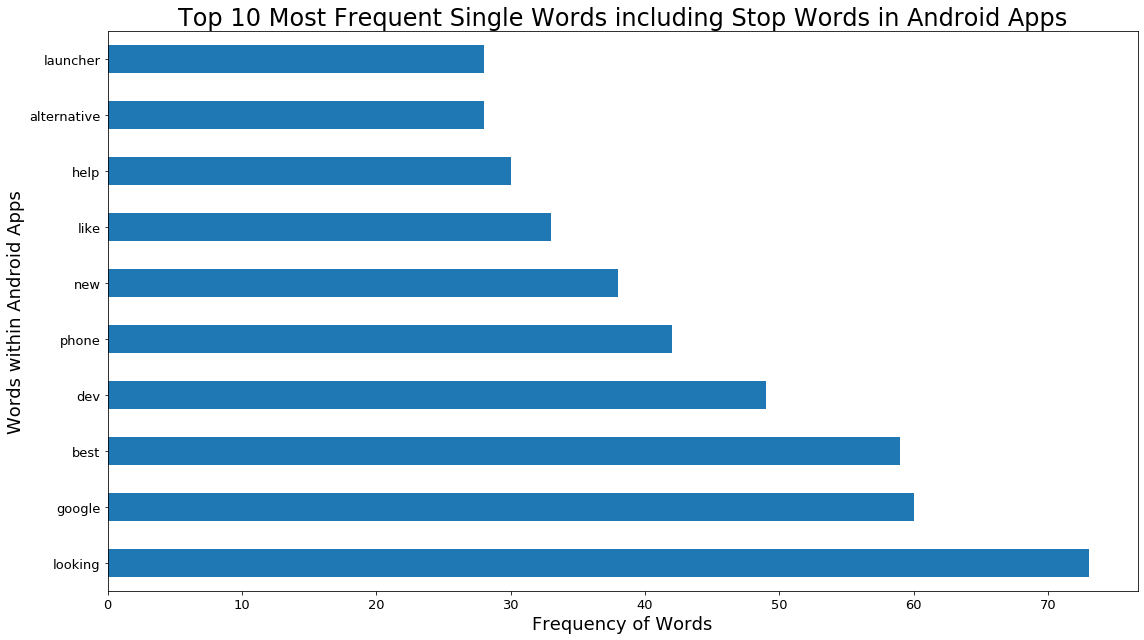

In [26]:
plotting(android_apps_frequency_with_stop_words, 
         'Top 10 Most Frequent Single Words including Stop Words in Android Apps', 
         'Frequency of Words', 
         'Words within Android Apps', 
         'top_10_android_apps_most_frequent_words_including_stop_words')

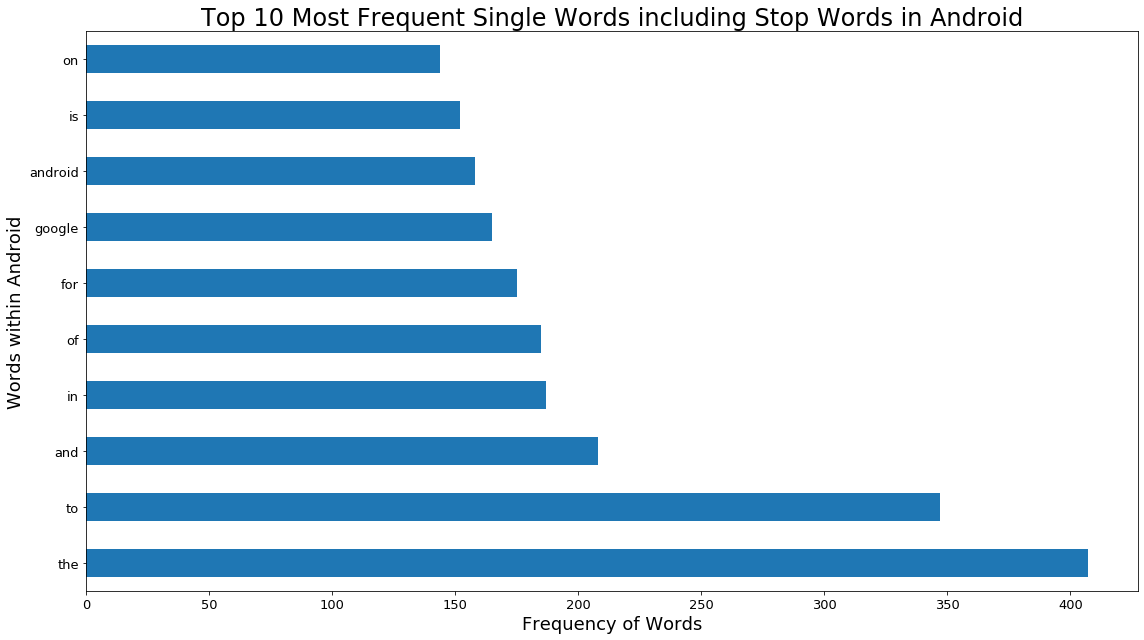

In [27]:
plotting(android_frequency_with_stop_words, 
         'Top 10 Most Frequent Single Words including Stop Words in Android', 
         'Frequency of Words', 
         'Words within Android', 
         'top_10_android_most_frequent_words_including_stop_words')

We proceed to combine the two dataframes into a large single dataframe for comparison. We will still examine if the count of words and their frequency changed when combined. Perhaps there were some words where both forums had in common. We begin by examining the data before we remove the stop words. As expected, the presense of stop words will not give us much information on the posting style and the frequency use of delineating words between the two forums.

In [28]:
combined_df_with_stop_words = cvec_with_stop_words.fit_transform(combined_df['posts'])
combined_df_frequency_with_stop_words = pd.DataFrame(combined_df_with_stop_words.toarray(), 
                                         columns = cvec_with_stop_words.get_feature_names())
combined_df_frequency_with_stop_words.sum().sort_values(ascending = False).head(10)

to         619
app        586
the        576
for        393
and        327
is         285
of         256
in         255
android    248
on         230
dtype: int64

Below is a visual chart for the tally of the combined dataframe. Because the stop words were not removed, we can see a lot of english particles were mostly used in forum posts.

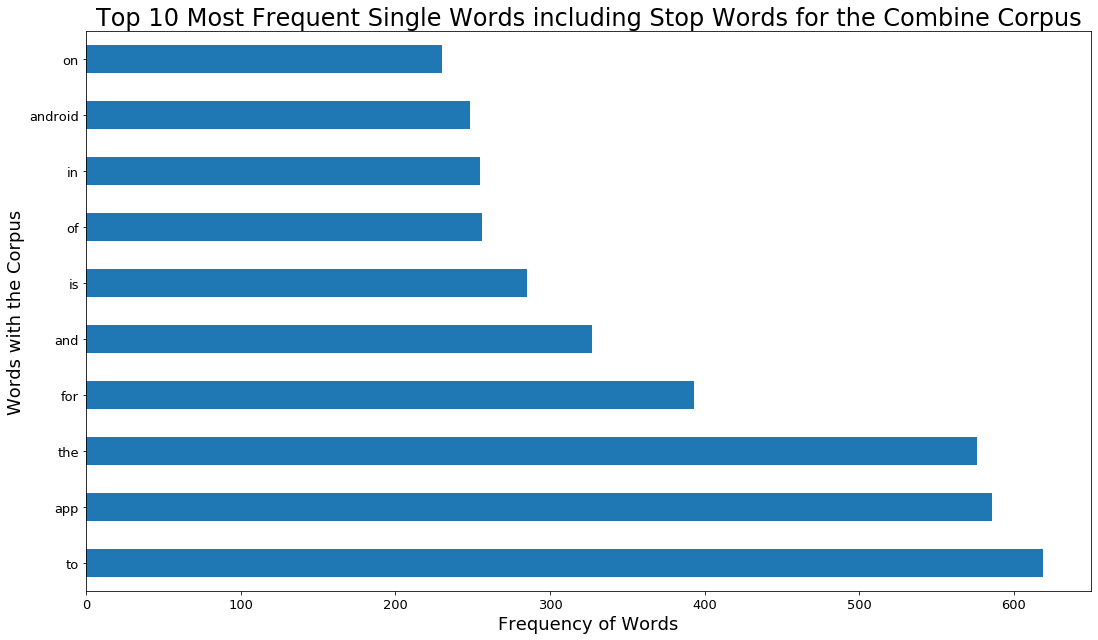

In [29]:
plotting(combined_df_frequency_with_stop_words, 
        'Top 10 Most Frequent Single Words including Stop Words for the Combine Corpus', 
         'Frequency of Words', 
         'Words with the Corpus', 
         'top_10_most_frequent_words_including_stop_words_in_the_combined_corpus')

In [30]:
combined_df_without_stop_words = cvec_without_stop_words.fit_transform(combined_df['posts'])
combined_df_frequency_without_stop_words = pd.DataFrame(combined_df_without_stop_words.toarray(), 
                                         columns = cvec_without_stop_words.get_feature_names())
combined_df_frequency_without_stop_words.sum().sort_values(ascending = False).head(10)

googl      223
phone      129
use        112
new        103
look        91
ani         83
best        73
updat       71
samsung     63
camera      63
dtype: int64

When stop words were removed, we see a much different tally of words used in both forums. However, because we stemmed the dataframe above, some of the words lost its identity and might give us false information for the actual words used. Nonetheless, this is still much better than including the stop words for the modeling process. Below are two visual charts to show the difference in tally between the dataframe including stop words and excluding stop words.

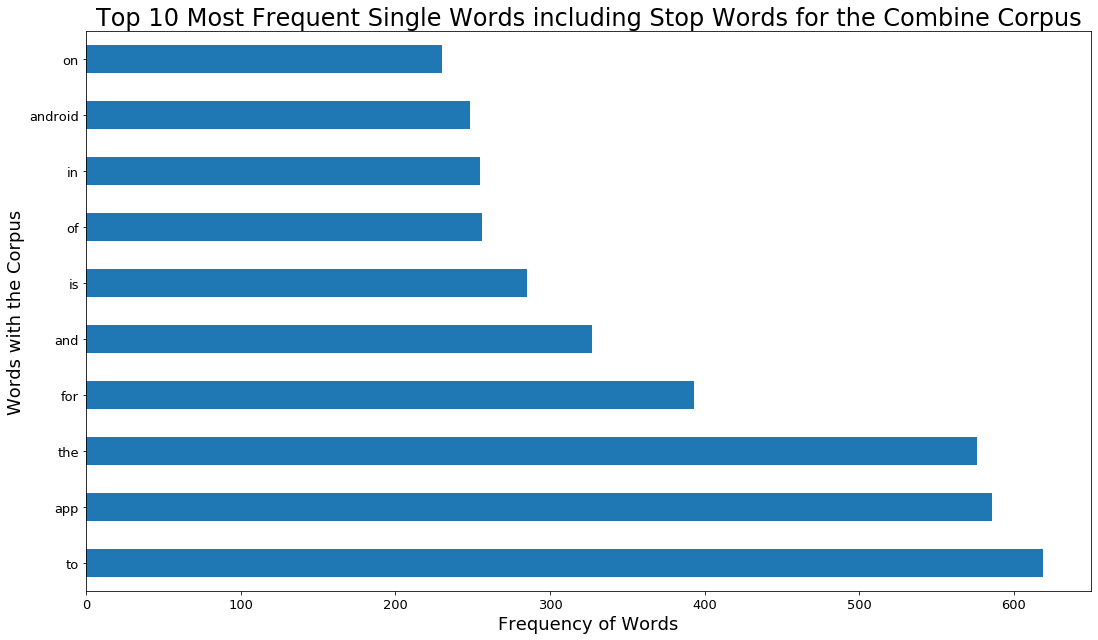

In [31]:
plotting(combined_df_frequency_with_stop_words, 
         'Top 10 Most Frequent Single Words including Stop Words for the Combine Corpus', 
         'Frequency of Words', 
         'Words with the Corpus', 
         'top_10_most_frequent_words_including_stop_words_in_the_combined_corpus')

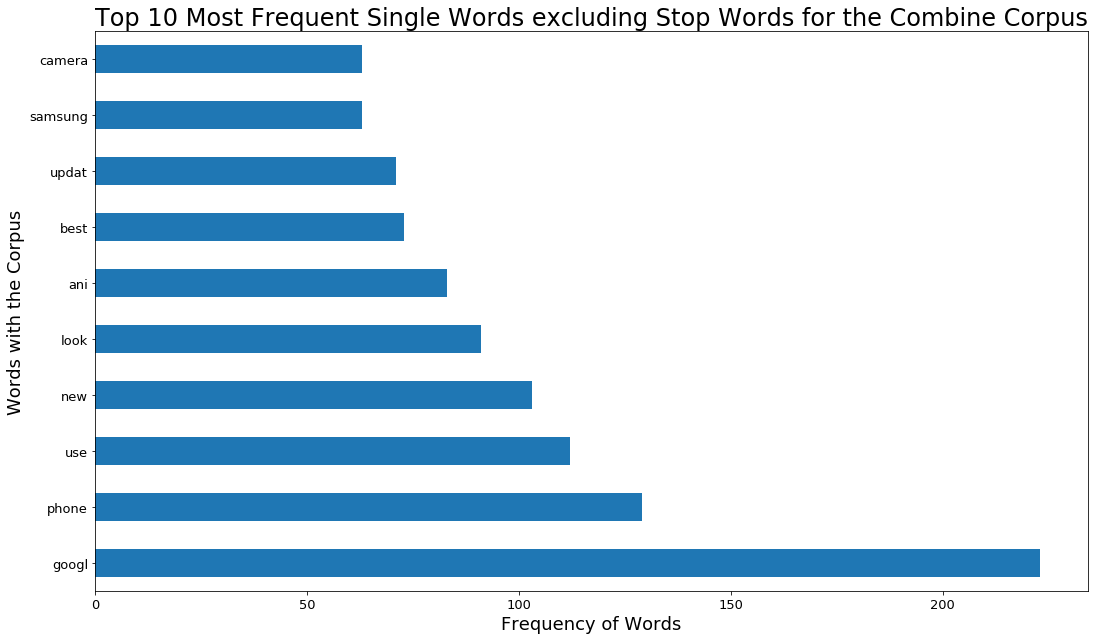

In [32]:
plotting(combined_df_frequency_without_stop_words, 
         'Top 10 Most Frequent Single Words excluding Stop Words for the Combine Corpus', 
         'Frequency of Words', 
         'Words with the Corpus', 
         'top_10_most_frequent_words_excluding_stop_words_in_the_combined_corpus')

As a final analysis, we want to explore bigram terms that might give us additional information on how forum users posts. Below are two visual charts for bigrams with and without stop words. As expected, the results are quite different between the two.

In [33]:
combinded_df_2_gram_with_stop_words = cvec_2_gram_with_stop_words.fit_transform(combined_df['posts'])
combinded_df_frequency_2_gram_with_stop_words = pd.DataFrame(combinded_df_2_gram_with_stop_words.toarray(), 
                                                columns = cvec_2_gram_with_stop_words.get_feature_names())

combinded_df_2_gram_without_stop_words = cvec_2_gram_without_stop_words.fit_transform(combined_df['posts'])
combinded_df_frequency_2_gram_without_stop_words = pd.DataFrame(combinded_df_2_gram_without_stop_words.toarray(), 
                                                   columns = cvec_2_gram_without_stop_words.get_feature_names())

In [34]:
combinded_df_frequency_2_gram_with_stop_words.sum().sort_values(ascending = False).head(10)

app that      84
look for      74
an app        72
is there      65
app for       54
app to        53
app with      37
in the        37
of the        35
on android    31
dtype: int64

In [35]:
combinded_df_frequency_2_gram_without_stop_words.sum().sort_values(ascending = False).head(10)

samsung galaxi    24
oneplu pro        20
play store        19
googl play        17
googl pixel       17
jun weekli        15
dark mode         15
xiaomi mi         15
pixel xl          12
music player      12
dtype: int64

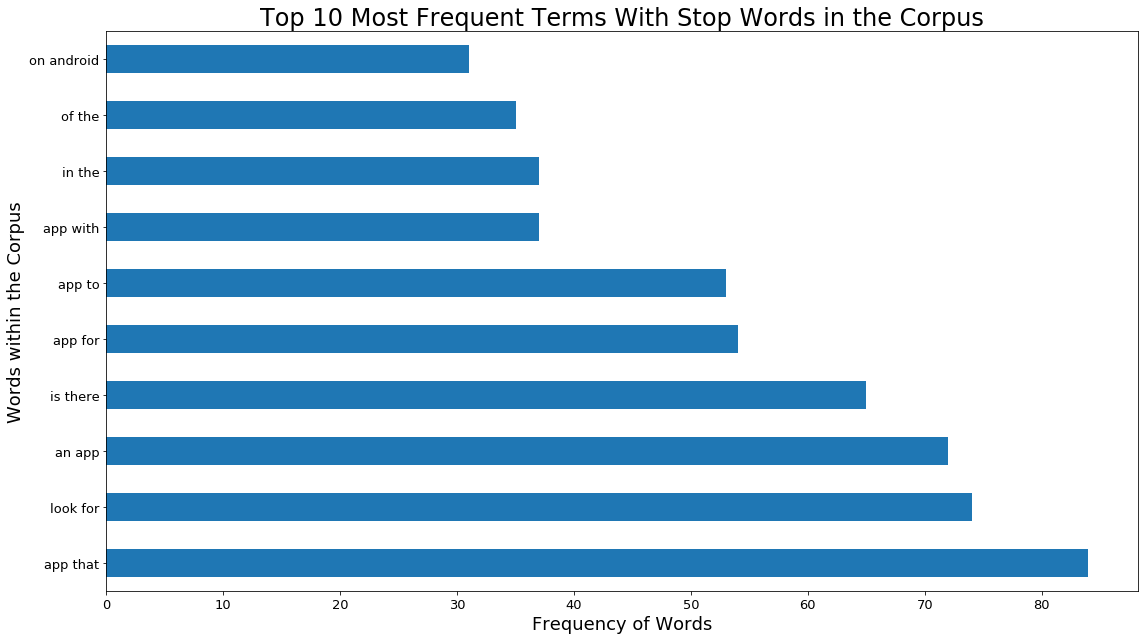

In [36]:
plotting(combinded_df_frequency_2_gram_with_stop_words, 
         'Top 10 Most Frequent Terms With Stop Words in the Corpus', 
         'Frequency of Words', 
         'Words within the Corpus', 
         'top_10_most_frequent_terms_with_stop_words')

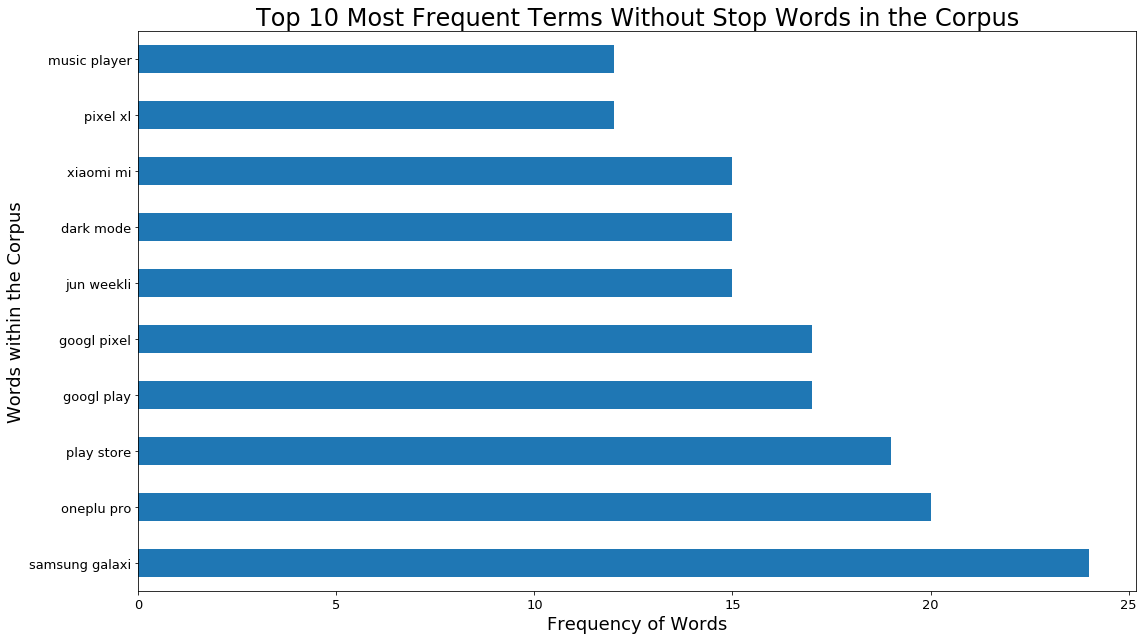

In [37]:
plotting(combinded_df_frequency_2_gram_without_stop_words, 
         'Top 10 Most Frequent Terms Without Stop Words in the Corpus', 
         'Frequency of Words', 
         'Words within the Corpus', 
         'top_10_most_frequent_terms_without_stop_words')

### Modeling Process

[Top](#Table-of-Contents)

For our models we want to select the ones that is designed for classificiation. Because of a wide selection of models, we will explore a decent amount of models and their interpretations of the data. While not all models will produce the optimal result, we want to have a standard for a decent output. For this project, we want to minimize false positives because we do not want to misdirect our shareholder to the wrong category when a particular post is queried. In addition, we also want to high accuracy score since we want our model to predict correctly as much as possible. For our modeling, we will use Grid Search as a tool to find the best parameters for each model. 

In [38]:
combined_df['subreddit_flag'].value_counts(normalize = True)

1    0.540968
0    0.459032
Name: subreddit_flag, dtype: float64

Above we see a baseline of about 54.1% of the posts belonging to the Android forum. This means that, if one were to randomly pick a post without any knowledge, then that particular post will belong to the Android forum with a chance of 54.1%. We want our models to score above this baseline because otherwise, randomly guessing would be more accurate than our prediction which is quite terrible for a model if that were to occur. Below we instantiate our predictor and target variables for modeling. We also need to split the data into their appropriate proportions to test the model itself. Lastly, we want to stratify the split with the target variable to ensure that it is split evenly.

In [39]:
X = combined_df['posts']
y = combined_df['subreddit_flag']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

We want to also instantiate the models so that it is easier to call the class without needed to type the entire name everytime.

In [41]:
cvec = CountVectorizer()
tvec = TfidfVectorizer()
lr = LogisticRegression()
gau = GaussianNB()
ber = BernoulliNB()
mlt = MultinomialNB()
dt = DecisionTreeClassifier()
svc = SVC()
xgboost = xgb.XGBClassifier()

We are defining a function here were we streamlined the classification metrics. This will prevent over use of code blocks and crowding the modeling phase. The first function runs the GridSearch model and gives the best parameters for that particular model as well as the scores for the test model. The second function generates a the classification metrics for that particular model. And lastly, the third function generates the ROC Curve and its area under the curve.

In [42]:
def results(model, X_train, y_train, X_test, y_test):
    t0 = time.time()
    model.fit(X_train, y_train);
    time_spent = time.time() - t0
    print(f'This model took {round(time_spent,4)} seconds to complete.')
    print(f'The best parameters for this {model.best_params_}.')
    print(f'The best score for the training data for this model is {round(model.best_score_, 3)}.')
    print(f'The testing score for this model is {round(model.score(X_test, y_test), 3)}.')

In [43]:
def metrics(y_true, y_pred, model, X_test):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() # defines the value for confusion matrix
    acc = model.score(X_test, y_test)  #calculates the accuracy for the model
    mis = 1 - acc # calculates the misclassication for the model
    spec = tn / (tn+fp) # calculates the specificity for the model
    sens = tp / (tp+fn) # calculates the sensitivity for the model
    prec = tp / (tp+fp) # calculates the precision for the model

    # Print results for metrics
    print(f'The accuracy for this model is {round(acc,3)}')
    print(f'The misclassification for this model is: {round(mis,3)}')
    print(f'The specificity for this model is: {round(spec,3)}')
    print(f'The sensitivity for this model is: {round(sens,3)}')
    print(f'The precision for this model is: {round(prec,3)}')

In [44]:
def roc(model_prob, X_test, y_test, y_pred, name_of_chart, filename):
    # code for this graph is from GA DSI Lecture 4.04
    model_prob = [i[1] for i in model_prob.predict_proba(X_test)]
    model_pred_df = pd.DataFrame({'true_values': y_test,
                                    'pred_probs':model_prob})

    thresholds = np.linspace(0, 1, 400) # 400 steps of floating points (decimals) between 0 and 1. This is a placeholder for 
                                        # probability as it starts from 0 and slowly approaches 1. We will use these numbers as
                                        # a guide to see how the number of predicted values change as we move closer to 1.
    
    # For this particular function, it calculates the value of sensitivity at a particular point along the threshold values.
    # Since each point of threshold presents the probability of that instance, the true positive rate should decrease as the 
    # strictness increases. Therefore, there is an inverse relationship between higher threshold and the amount of true positives
    # present.
    def true_positive_rate(df, true_col, pred_prob_col, threshold):
        true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
        false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
        return true_positive / (true_positive + false_negative)
    
    # This function shows the false positive rate which is expressed as 1 - Specificity. We want to see how that rate changes
    # as specificity increases toward 1 along with sensitivity.
    def false_positive_rate(df, true_col, pred_prob_col, threshold):
        true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
        false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
        return 1 - (true_negative / (true_negative + false_positive))

    # We want to store the sensitivity values and 1 - specificity values in 2 different lists. We can compare these value
    # point-for-point on a line graph so show their relationship. 
    tpr_values = [true_positive_rate(model_pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
    fpr_values = [false_positive_rate(model_pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

    
    # below we set the parameters for the chart size as well as figures for plotting. The main variables are False Positive 
    # Rate and the True Positive Rate plotted as a line. The x-axis will be represented by 1 - specificity to show the 
    # relationship as sensitivity increases, what happens to specificity.
    plt.figure(figsize = (13,10))
    plt.plot(fpr_values, 
             tpr_values, 
             label='ROC Curve')

    plt.plot(np.linspace(0, 1, 400),
             np.linspace(0, 1, 400),
             label='baseline',
             linestyle='--')


    plt.title(name_of_chart, fontsize=22)
    plt.ylabel('Sensitivity', fontsize=18)
    plt.xlabel('1 - Specificity', fontsize=18)


    plt.legend(fontsize=16)
    
    plt.tight_layout()
    plt.savefig(f'../graphs/{str(filename)}.png'); #saves the 

    print(f'The area under the ROC curve is {roc_auc_score(y_test, y_pred)}.')

#### Logistic Regression Model With CountVectorizer

[Top](#Table-of-Contents)

The logistic regression model is the simplest model for classificiation modeling. This model gives us the probability of how each subreddit post belongs to their appropriate subreddit with the default threshold at being 50%. In addition, this model is based on either Ridge or Lasso which penalizes features that do not seem to contribute as much when predicting the target. We initially want to use Countvectorizer and let the model penalize its variables to see how the score performs. The parameters are tuned to below to give the optimal score based on the vectorize and model

In [45]:
pipe_lr_cvec = Pipeline( [('cvec', CountVectorizer(stop_words = s_words)),
                          ('lr', LogisticRegression())])

lr_cvec_params = {'cvec__max_features': [1500, 1750, 2000],
                  'cvec__max_df': [.65, .7, .75]}

gs_lr_cvec = GridSearchCV(pipe_lr_cvec, param_grid = lr_cvec_params, cv = 5, n_jobs = 8)

Below is the best parameters discovered using GridSearch to get the optimal accuracy score. This however might not optimize for the Classification Metrics.

In [46]:
results(gs_lr_cvec, X_train, y_train, X_test, y_test)

This model took 5.0555 seconds to complete.
The best parameters for this {'cvec__max_df': 0.65, 'cvec__max_features': 1750}.
The best score for the training data for this model is 0.82.
The testing score for this model is 0.828.


- Classification Metrics for Logistic Regression with CountVectorizer:
    - Below we have the Confusion Matrix and ROC Curve for this combination of Transformer and Model
    - The Classification Metrics described using the Metrics Function on the appropriate variables
    - The area under the curve for the AOC curve will be described on top of the chart

In [47]:
lr_cvec_pred = gs_lr_cvec.predict(X_test)
confusion_matrix(y_test, lr_cvec_pred)

array([[206,  34],
       [ 56, 226]], dtype=int64)

In [48]:
metrics(y_test, lr_cvec_pred, gs_lr_cvec, X_test)

The accuracy for this model is 0.828
The misclassification for this model is: 0.172
The specificity for this model is: 0.858
The sensitivity for this model is: 0.801
The precision for this model is: 0.869


The area under the ROC curve is 0.8298758865248228.


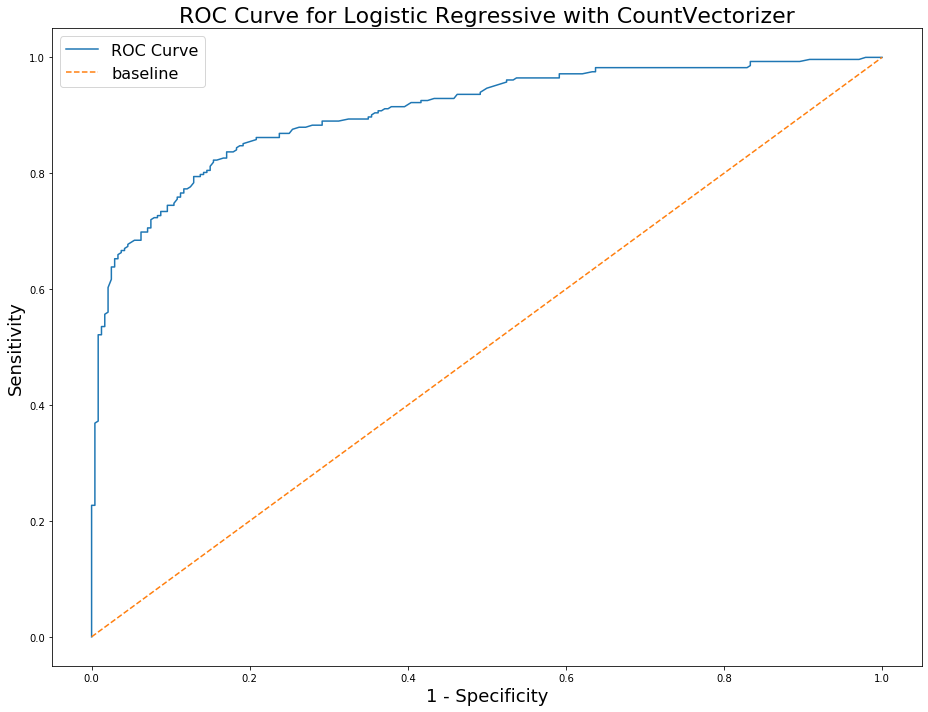

In [49]:
roc(gs_lr_cvec, 
    X_test, 
    y_test, 
    lr_cvec_pred, 
    'ROC Curve for Logistic Regressive with CountVectorizer', 
    'ROC Curve for Logistic Regressive with CountVectorizer')

The Logistic Model gave a satisfactory score of about 85.1% accuracy. The False Positives and False Negatives rates were not as low as expected but we will evaluate the other models and compare the scores as we proceed. The general shape of the ROC curve is as good because the points are along the upper half of the line of no-discrimination. The line of no-discrimination implies that the model cannot differentiate between a random guess and a prediction with reasonable accuracy. If the ROC curve fell along the line of no-discrimination, the model is essentially terrible because it would not be able to differentiate from a random guess and actual modeling.  

#### Logistic Regression Model With TFIDFVectorizer

[Top](#Table-of-Contents)

We want to examine the Logistic model again with TFDIFVectorizer. As opposed to the CountVectorizer, TFIDFVectorizer imposes a penalty for its features that are common words and increase the weight of rare words. 

In [50]:
pipe_lr_tvec = Pipeline( [('tvec', TfidfVectorizer(stop_words = s_words)),
                          ('lr', LogisticRegression())])

lr_tvec_params = {'tvec__max_features': [750, 1000, 1250],
                  'tvec__max_df': [.7, .75, .8],
                  'tvec__min_df': [1, 2, 3]}

gs_lr_tvec = GridSearchCV(pipe_lr_tvec, param_grid = lr_tvec_params, cv = 5, n_jobs = 8)

Below is the best parameters discovered using GridSearch to get the optimal accuracy score. This however might not optimize for the Classification Metrics.

In [51]:
results(gs_lr_tvec, X_train, y_train, X_test, y_test)

This model took 2.8441 seconds to complete.
The best parameters for this {'tvec__max_df': 0.7, 'tvec__max_features': 1250, 'tvec__min_df': 1}.
The best score for the training data for this model is 0.81.
The testing score for this model is 0.824.


- Classification Metrics for Logistic Regression with TFIDFVectorizer:
    - Below we have the Confusion Matrix and ROC Curve for this combination of Transformer and Model
    - The Classification Metrics described using the Metrics Function on the appropriate variables
    - The area under the curve for the AOC curve will be described on top of the chart

In [52]:
lr_tvec_pred = gs_lr_tvec.predict(X_test)
confusion_matrix(y_test, lr_tvec_pred)

array([[189,  51],
       [ 41, 241]], dtype=int64)

In [53]:
metrics(y_test, lr_tvec_pred, gs_lr_tvec, X_test)

The accuracy for this model is 0.824
The misclassification for this model is: 0.176
The specificity for this model is: 0.788
The sensitivity for this model is: 0.855
The precision for this model is: 0.825


The area under the ROC curve is 0.8210549645390071.


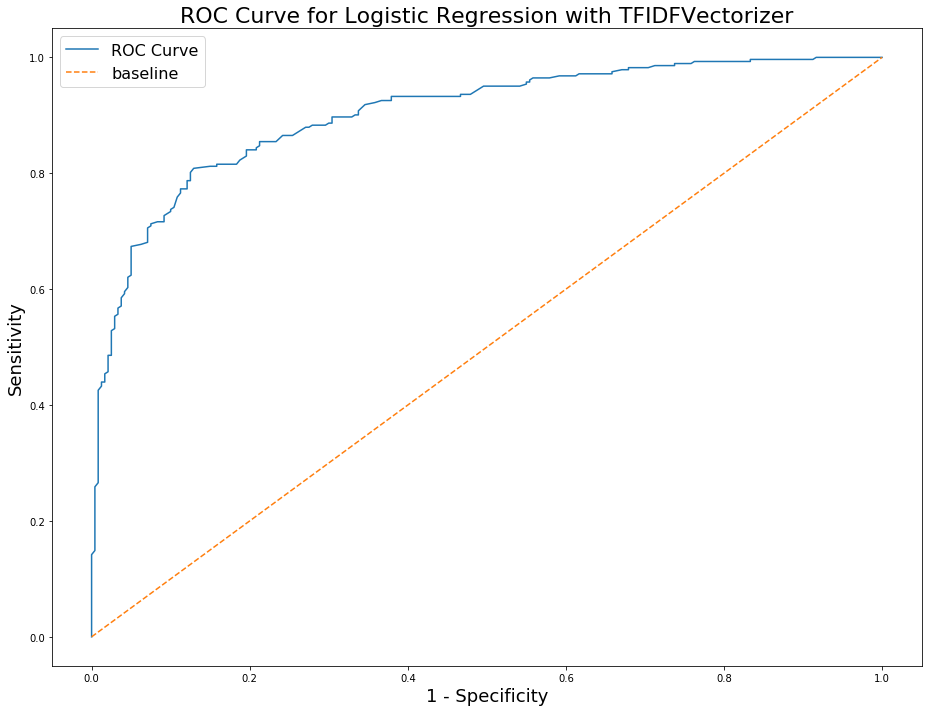

In [54]:
roc(gs_lr_tvec, 
    X_test, 
    y_test, 
    lr_tvec_pred, 
    'ROC Curve for Logistic Regression with TFIDFVectorizer', 
    'ROC Curve for Logistic Regression with TFIDFVectorizer')

Utilizing TFIDF with Logistic Regression improved the accuracy of our model ever so slightly. The ROC area under the curve has decreased ever so slightly. The false negatives have decreased in exchange for an increase for false positives. Because we are trying to minimize false positives, this combination of transformation and model did not meet our expectations. We will proceed with Naive Bayes next and see how well it performs compared to the Logistic model.

#### Multinomial Naive Bayes With CountVectorizer

[Top](#Table-of-Contents)

Naive Bayes models assumes that each feature (words) are independent of each other and attempts to predict the target based on the information of the features. Even though the features might be colinear in nature, this assumption has worked quite well for text prediction. For our model, we will utilize the Multinomial version of Naive Bayes because our values are positive integers for each feature. We will begin with CountVectorizer and evaluate the model.

In [55]:
pipe_mlt_cvec = Pipeline( [('cvec', CountVectorizer(stop_words = s_words)),
                           ('mlt', MultinomialNB())])

mlt_cvec_params = {'cvec__max_features': [2500, 3000, 3500],
                   'cvec__max_df': [.7, .8, .85]}
        

gs_mlt_cvec = GridSearchCV(pipe_mlt_cvec, param_grid = mlt_cvec_params, cv = 5, n_jobs = 8)

Below is the best parameters discovered using GridSearch to get the optimal accuracy score. This however might not optimize for the Classification Metrics.

In [56]:
results(gs_mlt_cvec, X_train, y_train, X_test, y_test)

This model took 0.9738 seconds to complete.
The best parameters for this {'cvec__max_df': 0.7, 'cvec__max_features': 3000}.
The best score for the training data for this model is 0.819.
The testing score for this model is 0.81.


- Classification Metrics for Multinomial Naive Bayes with CountVectorizer:
    - Below we have the Confusion Matrix and ROC Curve for this combination of Transformer and Model
    - The Classification Metrics described using the Metrics Function on the appropriate variables
    - The area under the curve for the AOC curve will be described on top of the chart

In [57]:
mlt_pred = gs_mlt_cvec.predict(X_test)
confusion_matrix(y_test, mlt_pred)

array([[200,  40],
       [ 59, 223]], dtype=int64)

In [58]:
metrics(y_test, mlt_pred, gs_mlt_cvec, X_test)

The accuracy for this model is 0.81
The misclassification for this model is: 0.19
The specificity for this model is: 0.833
The sensitivity for this model is: 0.791
The precision for this model is: 0.848


The area under the ROC curve is 0.8120567375886525.


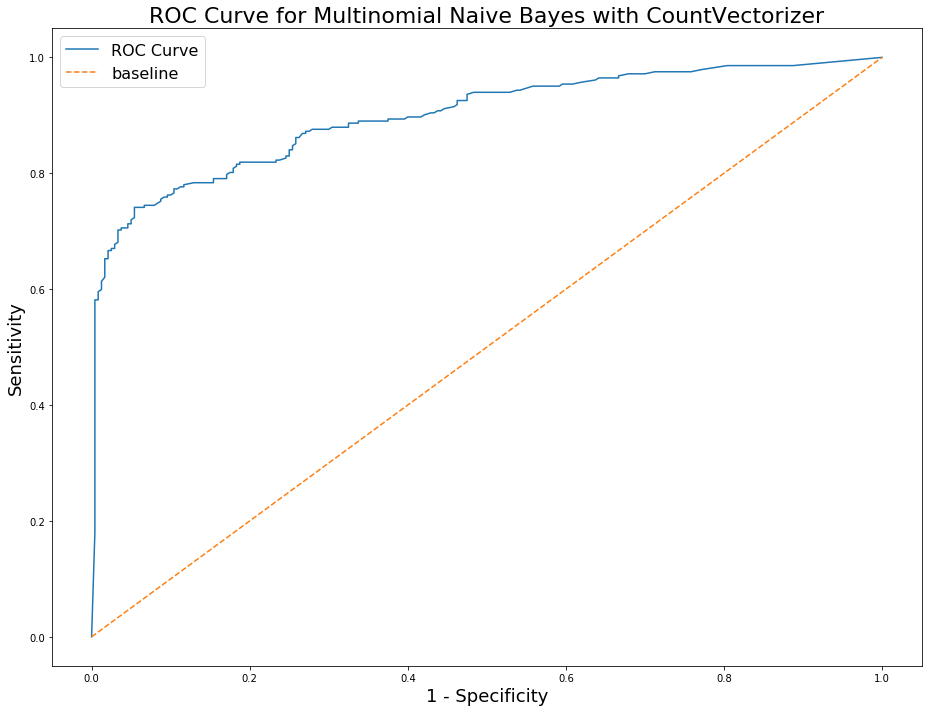

In [59]:
roc(gs_mlt_cvec, 
    X_test, 
    y_test, 
    mlt_pred, 
    'ROC Curve for Multinomial Naive Bayes with CountVectorizer', 
    'ROC Curve for Multinomial Naive Bayes with CountVectorizer')

The confusion matrix for this model did not reduce the number of false positives as much as we would have hoped. In addition, the ROC curve appears to be a less smooth with the area less than the Logistic Model. This particular model does not appear to be a better model the previous.

#### Multinomial Naive Bayes With TFIDFVectorizer

[Top](#Table-of-Contents)

We now want to fit the TFIDF transformer for the Multinomial Naive Bayes Model and see if adding a penalty to common words will have a positive affect on the prediction. As shown below, the parameters optimization will have different values with a different transformer. 

In [60]:
pipe_mlt_tvec = Pipeline( [('tvec', TfidfVectorizer(stop_words = s_words)),
                           ('mlt', MultinomialNB())])

mlt_tvec_params = {'tvec__max_features': [3500, 4000, 4500],
                   'tvec__max_df': [.7, .8, .85],
                   'tvec__ngram_range': [(1,1), (1,2), (1,3)]}
        

gs_mlt_tvec = GridSearchCV(pipe_mlt_tvec, param_grid = mlt_tvec_params, cv = 5, n_jobs = 8)

Below is the best parameters discovered using GridSearch to get the optimal accuracy score. This however might not optimize for the Classification Metrics.

In [61]:
results(gs_mlt_tvec, X_train, y_train, X_test, y_test)

This model took 4.2708 seconds to complete.
The best parameters for this {'tvec__max_df': 0.7, 'tvec__max_features': 4000, 'tvec__ngram_range': (1, 2)}.
The best score for the training data for this model is 0.825.
The testing score for this model is 0.839.


- Classification Metrics for Multinomial Naive Bayes with TFIDFVectorizer:
    - Below we have the Confusion Matrix and ROC Curve for this combination of Transformer and Model
    - The Classification Metrics described using the Metrics Function on the appropriate variables
    - The area under the curve for the AOC curve will be described on top of the chart

In [62]:
mlt_tvec_pred = gs_mlt_tvec.predict(X_test)
confusion_matrix(y_test, mlt_tvec_pred)

array([[197,  43],
       [ 41, 241]], dtype=int64)

In [63]:
metrics(y_test, mlt_tvec_pred, gs_mlt_tvec, X_test)

The accuracy for this model is 0.839
The misclassification for this model is: 0.161
The specificity for this model is: 0.821
The sensitivity for this model is: 0.855
The precision for this model is: 0.849


The area under the ROC curve is 0.8377216312056737.


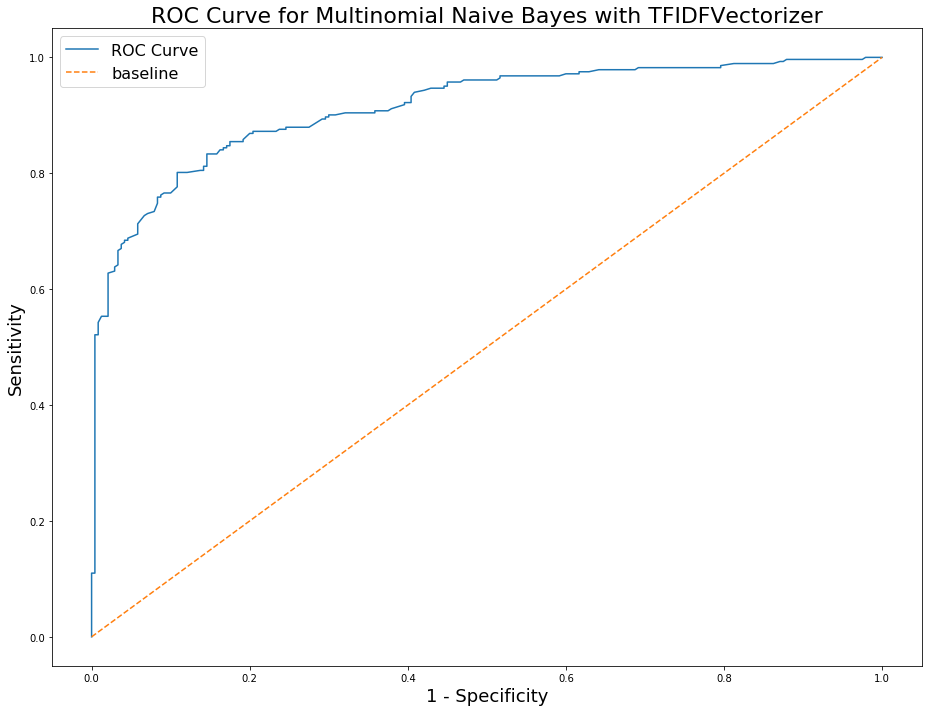

In [64]:
roc(gs_mlt_tvec, 
    X_test, 
    y_test, 
    mlt_tvec_pred, 
    'ROC Curve for Multinomial Naive Bayes with TFIDFVectorizer', 
    'ROC Curve for Multinomial Naive Bayes with TFIDFVectorizer')

We observe that the accuracy has increased but the false positives also increased in according with the confusion matrix. Although it did perform better than the model using Countvectorizer, we would not consider this model to be better than its Logistic counterpart. We will continue below using Random Forest and see if it will yeidl a better result.

#### Random Forest with CountVectorizer

[Top](#Table-of-Contents)

The Random Forest model is a robust model that utilizes bootstrap methods while randomly limiting the amount of branches being uses at each node. This process will consider some features that are deem irrelevant and branch on those features to see if they improve accuracy. With each word being a feature for this corpus, this model could detect some signficant words where other models consider them not relevant.

In [65]:
pipe_rf_cvec = Pipeline( [('cvec', CountVectorizer(stop_words = s_words)),
                          ('rf', RandomForestClassifier(random_state = 42))])

rf_cvec_params = {'cvec__max_features': [1000, 1250],
                  'cvec__max_df': [.8, .9, 95],
                  'cvec__min_df': [1],
                  'rf__n_estimators': [70, 75, 80],
                  'rf__max_depth': [70, 75, 80], 
                  'rf__min_samples_split': [20, 25, 30]}

gs_rf_cvec = GridSearchCV(pipe_rf_cvec, param_grid = rf_cvec_params, cv = 5, n_jobs = 8)

Below is the best parameters discovered using GridSearch to get the optimal accuracy score. This however might not optimize for the Classification Metrics.

In [66]:
results(gs_rf_cvec, X_train, y_train, X_test, y_test)

This model took 60.2863 seconds to complete.
The best parameters for this {'cvec__max_df': 0.8, 'cvec__max_features': 1000, 'cvec__min_df': 1, 'rf__max_depth': 80, 'rf__min_samples_split': 20, 'rf__n_estimators': 75}.
The best score for the training data for this model is 0.801.
The testing score for this model is 0.816.


- Classification Metrics for Random Forest with CountVectorizer:
    - Below we have the Confusion Matrix and ROC Curve for this combination of Transformer and Model
    - The Classification Metrics are also presented
    - The area under the curve for the AOC curve will be described on top of the chart

In [67]:
rf_cvec_pred = gs_rf_cvec.predict(X_test)
confusion_matrix(y_test, rf_cvec_pred)

array([[199,  41],
       [ 55, 227]], dtype=int64)

In [68]:
metrics(y_test, rf_cvec_pred, gs_rf_cvec, X_test)

The accuracy for this model is 0.816
The misclassification for this model is: 0.184
The specificity for this model is: 0.829
The sensitivity for this model is: 0.805
The precision for this model is: 0.847


The area under the ROC curve is 0.8170656028368795.


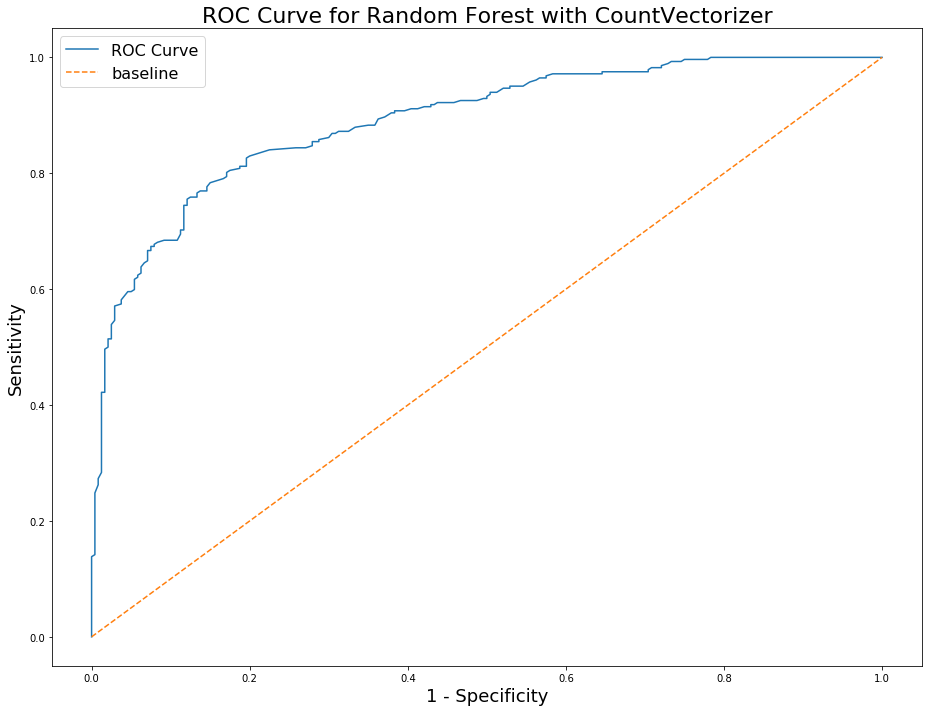

In [69]:
roc(gs_rf_cvec, 
    X_test, 
    y_test, 
    rf_cvec_pred, 
    'ROC Curve for Random Forest with CountVectorizer', 
    'ROC Curve for Random Forest with CountVectorizer')

When comparing the accuracy and the general metrics for this model, it was not overall impressive. The shape of the ROC curve exhibit a more dented corner which indicates the specificity and sensitivity level has dropped. Althought this model did perform a little bit better than the Multinomial Naive Bayes using CountVectorizer, it still underperformed comapred to the Logistic and Multinomial Naive Bayes using TFIDFVectorizer.

#### Random Forest with TFIDFVectorizer

[Top](#Table-of-Contents)

We are shitfing to try the Random Forest using TFIDFVectorizer as a transformer and see if there are improvements. Because TFIDFVectorizer penalizes common words and increases the relevance of rare words, it might do exactly the opposite of what Random Forest does where the model tries to bring relevance to words the transformer is trying to suppress. We predict this model will not perform too well since both the transform and model are working against each other.

In [70]:
pipe_rf_tvec = Pipeline( [('tvec', TfidfVectorizer(stop_words = s_words)),
                          ('rf', RandomForestClassifier(random_state = 42))])

rf_tvec_params = {'tvec__max_features': [1000, 1250, 1500],
                  'tvec__max_df': [.8, .9, 95],
                  'tvec__min_df': [1, 2, 3],
                  'rf__n_estimators': [70, 75, 80],
                  'rf__max_depth': [70, 75, 80], 
                  'rf__min_samples_split': [20, 25, 30]}

gs_rf_tvec = GridSearchCV(pipe_rf_tvec, param_grid = rf_tvec_params, cv = 5, n_jobs = 8)

Below is the best parameters discovered using GridSearch to get the optimal accuracy score. This however might not optimize for the Classification Metrics.

In [71]:
results(gs_rf_tvec, X_train, y_train, X_test, y_test)

This model took 293.6807 seconds to complete.
The best parameters for this {'rf__max_depth': 75, 'rf__min_samples_split': 20, 'rf__n_estimators': 80, 'tvec__max_df': 0.8, 'tvec__max_features': 1000, 'tvec__min_df': 1}.
The best score for the training data for this model is 0.782.
The testing score for this model is 0.778.


- Classification Metrics for Random Forest with TFIDFVectorizer:
    - Below we have the Confusion Matrix and ROC Curve for this combination of Transformer and Model
    - The Classification Metrics are also presented
    - The area under the curve for the AOC curve will be described on top of the chart

In [72]:
rf_cvec_pred = gs_rf_cvec.predict(X_test)
confusion_matrix(y_test, rf_cvec_pred)

array([[199,  41],
       [ 55, 227]], dtype=int64)

In [73]:
metrics(y_test, rf_cvec_pred, gs_rf_cvec, X_test)

The accuracy for this model is 0.816
The misclassification for this model is: 0.184
The specificity for this model is: 0.829
The sensitivity for this model is: 0.805
The precision for this model is: 0.847


The area under the ROC curve is 0.8170656028368795.


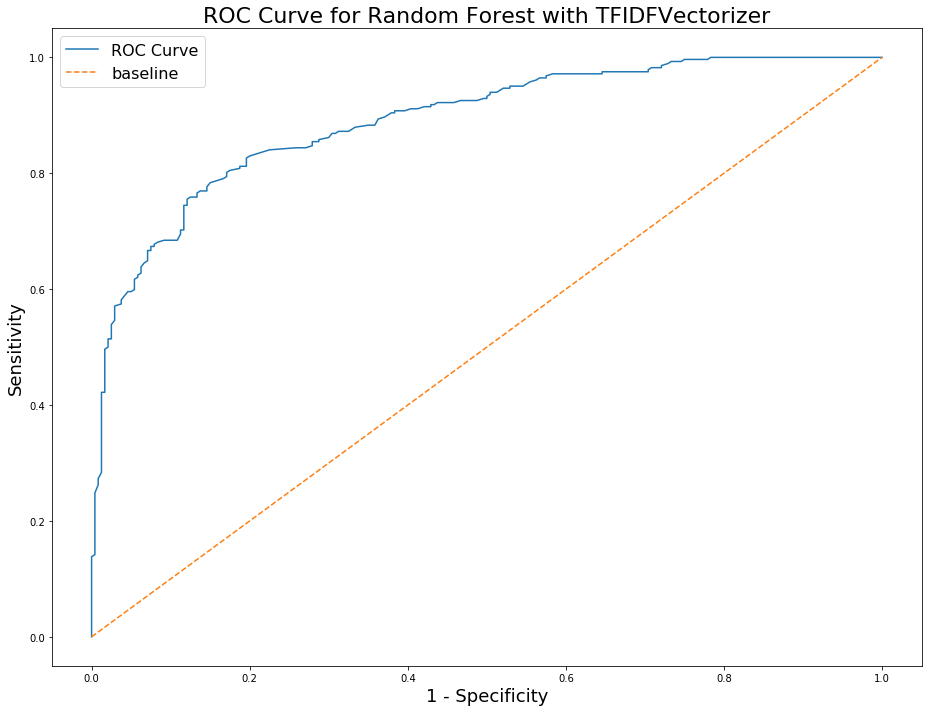

In [74]:
roc(gs_rf_cvec, 
    X_test, 
    y_test, 
    rf_cvec_pred, 
    'ROC Curve for Random Forest with TFIDFVectorizer', 
    'ROC Curve for Random Forest with TFIDFVectorizer')

As expected, this particular combination of transformer and model did hurt the accuracy quite substantially. Surprisingly the area under the ROC curve is on par with the Random Forest using CountVectorizer but the shape is still not as smooth as the Logistic Model. With most of the classficiation being in the .8 range, we can see how this model did not perform well at all relative to the other models we have seen so far. 

#### XGBoost With CountVectorizer

[Top](#Table-of-Contents)

The idea of boosting models in general is to take a very unrefined model (in this case, DecisionTree) and slowly refine the features for a designated amount of iterations. Each time it refines itself, the model is suppose to learn what should be the next best nodes by changing the weight of the features and continuously improve on each iterations. With XGBoost (Extreme Gradient Boost), it uses Gradient Boosting as a base algorithm and increases the speed of the model with a more robust analysis (although for this particular dataset, the completion time for the model is much longer than any other models within this report). 

In [75]:
pipe_xgb_cvec = Pipeline( [('cvec', CountVectorizer(stop_words = s_words)),
                           ('xgboost', xgb.XGBClassifier(random_state = 42))])

xgb_cvec_params = {'cvec__max_df': [.65, .7],
                   'cvec__max_features': [500, 750, 1000],
                   'xgboost__n_estimators': [110, 120, 130],
                   'xgboost__learning_rate': [.05],
                   'xgboost__max_depth': [25, 30, 35]}

gs_xgb_cvec = GridSearchCV(pipe_xgb_cvec, param_grid = xgb_cvec_params, cv = 5, n_jobs = 8)

Below is the best parameters discovered using GridSearch to get the optimal accuracy score. This however might not optimize for the Classification Metrics. 

**Please note: the XGBoost model is a very complex model where it can take a long time to run. Please do not run this model if you need to use the notebook for other operations. If you do run the model and it takes too long to complete, it might be recommended to interrupt the kernel. Otherwise, please feel free to run the model understanding the time it takes to complete.**

In [76]:
results(gs_xgb_cvec, X_train, y_train, X_test, y_test)

This model took 335.2782 seconds to complete.
The best parameters for this {'cvec__max_df': 0.65, 'cvec__max_features': 750, 'xgboost__learning_rate': 0.05, 'xgboost__max_depth': 30, 'xgboost__n_estimators': 120}.
The best score for the training data for this model is 0.786.
The testing score for this model is 0.789.


- Classification Metrics for XGBoost with CountVectorizer:
    - Below we have the Confusion Matrix and ROC Curve for this combination of Transformer and Model
    - The Classification Metrics are also presented
    - The area under the curve for the AOC curve will be described on top of the chart

In [77]:
xgb_cvec_pred = gs_xgb_cvec.predict(X_test)
confusion_matrix(y_test, xgb_cvec_pred)

array([[200,  40],
       [ 70, 212]], dtype=int64)

In [78]:
metrics(y_test, xgb_cvec_pred, gs_xgb_cvec, X_test)

The accuracy for this model is 0.789
The misclassification for this model is: 0.211
The specificity for this model is: 0.833
The sensitivity for this model is: 0.752
The precision for this model is: 0.841


The area under the ROC curve is 0.7925531914893618.


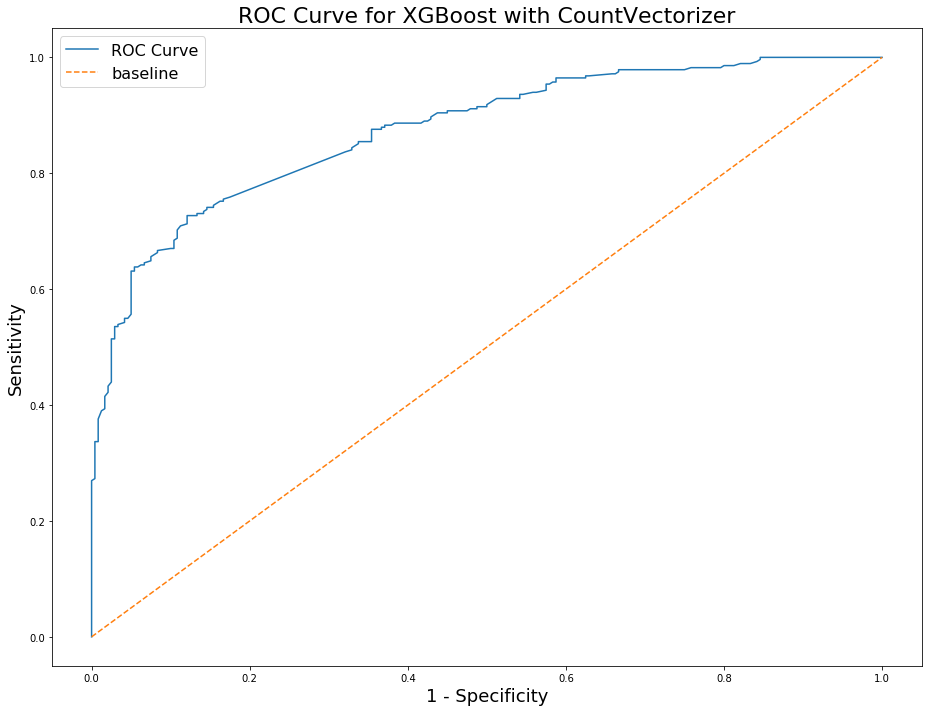

In [79]:
roc(gs_xgb_cvec, 
    X_test, 
    y_test, 
    xgb_cvec_pred, 
    'ROC Curve for XGBoost with CountVectorizer', 
    'ROC Curve for XGBoost with CountVectorizer')

The accuracy was actually quite terrible from all the positive things we heard about this model. It was touted to be a very strong model but sadly, perhaps for this particular dataset, it fell short and did not deliver. The ROC curve shape is severely dented on the curve and the area fell below .8 range. The sensitivity score was in the .7 range which means the false negative rate was quite high. This is supported by viewing the confusion matrix and observing 70 datapoints were determined to the false negative guesses. 

#### XGBoost With TFIDFVectorizer

[Top](#Table-of-Contents)

We now proceed to perform the TFIDF variant of the XGBoost model and hope it might perform better. with a different set of parameters, we might see a different score compared with the CountVectorizer transformer. As with the above, this model does take a while run.

In [80]:
pipe_xgb_tvec = Pipeline( [('tvec', TfidfVectorizer(stop_words = s_words)),
                           ('xgboost', xgb.XGBClassifier(random_state = 42))])

xgb_tvec_params = {'tvec__max_df': [.65],
                   'tvec__min_df': [2, 3, 4],
                   'tvec__max_features': [750, 1000],
                   'xgboost__n_estimators': [110],
                   'xgboost__learning_rate': [.3, .1, .05],
                   'xgboost__max_depth': [10, 15, 20]}

gs_xgb_tvec = GridSearchCV(pipe_xgb_tvec, param_grid = xgb_tvec_params, cv = 5, n_jobs = 8)

Below is the best parameters discovered using GridSearch to get the optimal accuracy score. This however might not optimize for the Classification Metrics. 

**Please note: the XGBoost model is a very complex model where it can take a long time to run. Please do not run this model if you need to use the notebook for other operations. If you do run the model and it takes too long to complete, it might be recommended to interrupt the kernel. Otherwise, please feel free to run the model understanding the time it takes to complete.**

In [81]:
results(gs_xgb_tvec, X_train, y_train, X_test, y_test)

This model took 183.4303 seconds to complete.
The best parameters for this {'tvec__max_df': 0.65, 'tvec__max_features': 750, 'tvec__min_df': 2, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 15, 'xgboost__n_estimators': 110}.
The best score for the training data for this model is 0.763.
The testing score for this model is 0.764.


- Classification Metrics for XGBoost with TFIDFVectorizer:
    - Below we have the Confusion Matrix and ROC Curve for this combination of Transformer and Model
    - The Classification Metrics are also presented
    - The area under the curve for the AOC curve will be described on top of the chart

In [82]:
xgb_tvec_pred = gs_xgb_tvec.predict(X_test)
confusion_matrix(y_test, xgb_tvec_pred)

array([[165,  75],
       [ 48, 234]], dtype=int64)

In [83]:
metrics(y_test, xgb_tvec_pred, gs_xgb_tvec, X_test)

The accuracy for this model is 0.764
The misclassification for this model is: 0.236
The specificity for this model is: 0.688
The sensitivity for this model is: 0.83
The precision for this model is: 0.757


The area under the ROC curve is 0.7925531914893618.


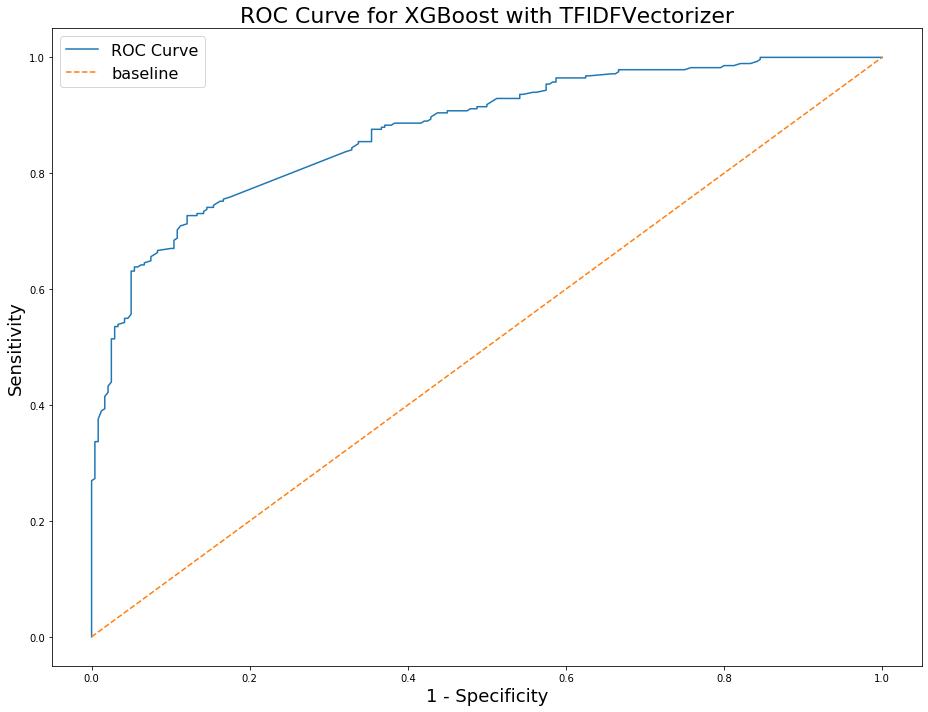

In [84]:
roc(gs_xgb_cvec, 
    X_test, 
    y_test, 
    xgb_cvec_pred, 
    'ROC Curve for XGBoost with TFIDFVectorizer', 
    'ROC Curve for XGBoost with TFIDFVectorizer')

This model is definitely disppointing as both CountVectorizer and TFDIFVectorizer were equally ineffective in giving a good accuracy score. The ROC curve shape is not better here than the CountVectorizer transformer with the area still being under the .8 range whereas the other models above seemed to perform better. We will examine the last model below to see if Support Vector Machines will have an improvement on the result. 

#### SVC with CountVectorizer

[Top](#Table-of-Contents)

Support Vector Machine models are utilized in attempting to classify data by seperating groups of data with a line, plane, or hyperplane to their appropriate groups. Many would consider the SVC model to be a black box model because it is very hard to explain why the features are significant to their contribution in helping the model predict the correct associate for forum posts. 

In [85]:
pipe_svc_cvec = Pipeline( [('cvec', CountVectorizer(stop_words = s_words)),
                           ('svc', SVC(gamma = 'scale', probability = True))])

svc_cvec_params = {'cvec__max_features': [750, 1000, 1500],
                   'cvec__ngram_range': [(1,2)],
                   'cvec__max_df': [.8],
                   'cvec__min_df': [2],
                   'svc__degree': [1],
                   'svc__C': [1]}

gs_svc_cvec = GridSearchCV(pipe_svc_cvec, param_grid = svc_cvec_params, cv = 5, n_jobs = 8)

Below is the best parameters discovered using GridSearch to get the optimal accuracy score. This however might not optimize for the Classification Metrics. 

In [86]:
results(gs_svc_cvec, X_train, y_train, X_test, y_test)

This model took 5.8327 seconds to complete.
The best parameters for this {'cvec__max_df': 0.8, 'cvec__max_features': 1000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'svc__C': 1, 'svc__degree': 1}.
The best score for the training data for this model is 0.8.
The testing score for this model is 0.849.


- Classification Metrics for Decision Tree with CountVectorizer:

In [87]:
svc_cvec_pred = gs_svc_cvec.predict(X_test)
confusion_matrix(y_test, svc_cvec_pred)

array([[208,  32],
       [ 47, 235]], dtype=int64)

In [88]:
metrics(y_test, svc_cvec_pred, gs_svc_cvec, X_test)

The accuracy for this model is 0.849
The misclassification for this model is: 0.151
The specificity for this model is: 0.867
The sensitivity for this model is: 0.833
The precision for this model is: 0.88


The area under the ROC curve is 0.8500000000000001.


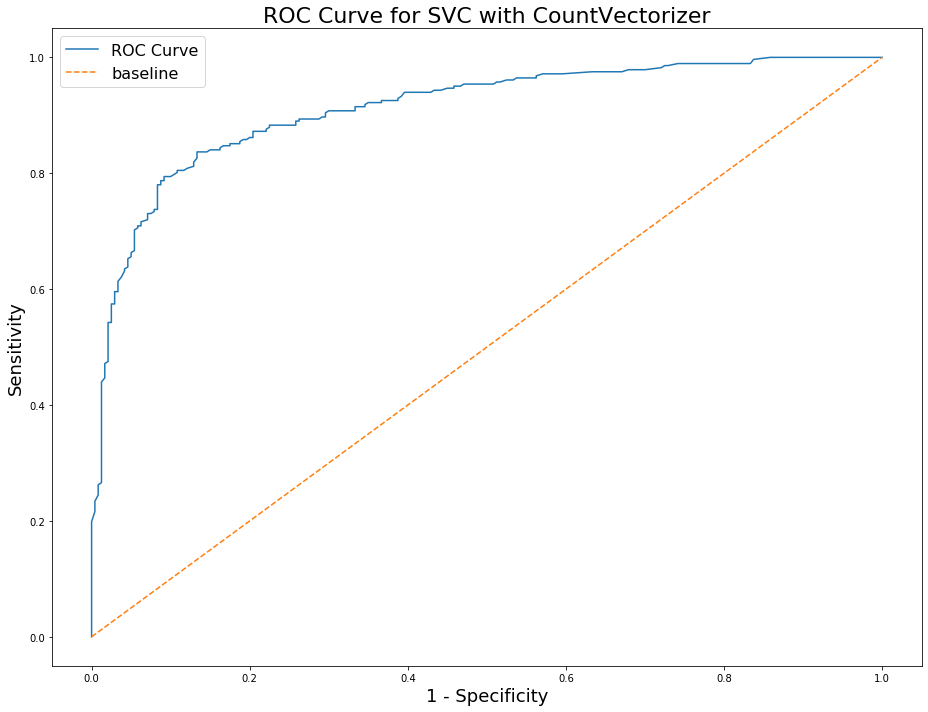

In [89]:
roc(gs_svc_cvec, 
    X_test, 
    y_test, 
    svc_cvec_pred, 
    'ROC Curve for SVC with CountVectorizer', 
    'ROC Curve for SVC with CountVectorizer')

It appears this particular model is the best model so far even winning over the Logistic model. The amount of false positives is the lowest compared to all models with a very good accuracy score. The general shape of the ROC curve as well as the area is also quite good with the area being at .84. It seems we have found our model that has decent metrics and a satisficatory score.

#### SVC with TFIDFVectorizer

[Top](#Table-of-Contents)

With the CountVectorizer variant performing quite well, we want to see if the TFIDFVectorzer variant will deliver in a similar manner. We suspect the accuracy would not be much different but the metric values might change. 

In [90]:
pipe_svc_tvec = Pipeline( [('tvec', TfidfVectorizer(stop_words = s_words)),
                           ('svc', SVC(gamma = 'scale', probability = True))])

svc_tvec_params = {'tvec__max_features': [1500, 2000, 2500],
                   'tvec__ngram_range': [(1,2)],
                   'tvec__max_df': [.65, .7],
                   'tvec__min_df': [2],
                   'svc__degree': [1],
                   'svc__C': [1]}

gs_svc_tvec = GridSearchCV(pipe_svc_tvec, param_grid = svc_tvec_params, cv = 5, n_jobs = 8)

Below is the best parameters discovered using GridSearch to get the optimal accuracy score. This however might not optimize for the Classification Metrics. 

In [91]:
results(gs_svc_tvec, X_train, y_train, X_test, y_test)

This model took 11.3173 seconds to complete.
The best parameters for this {'svc__C': 1, 'svc__degree': 1, 'tvec__max_df': 0.65, 'tvec__max_features': 2000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2)}.
The best score for the training data for this model is 0.827.
The testing score for this model is 0.837.


- Classification Metrics for SVC with CountVectorizer:
    - Below we have the Confusion Matrix and ROC Curve for this combination of Transformer and Model
    - The Classification Metrics are also presented
    - The area under the curve for the AOC curve will be described on top of the chart

In [92]:
svc_tvec_pred = gs_svc_tvec.predict(X_test)
confusion_matrix(y_test, svc_tvec_pred)

array([[188,  52],
       [ 33, 249]], dtype=int64)

In [93]:
metrics(y_test, svc_tvec_pred, gs_svc_tvec, X_test)

The accuracy for this model is 0.837
The misclassification for this model is: 0.163
The specificity for this model is: 0.783
The sensitivity for this model is: 0.883
The precision for this model is: 0.827


The area under the ROC curve is 0.8331560283687942.


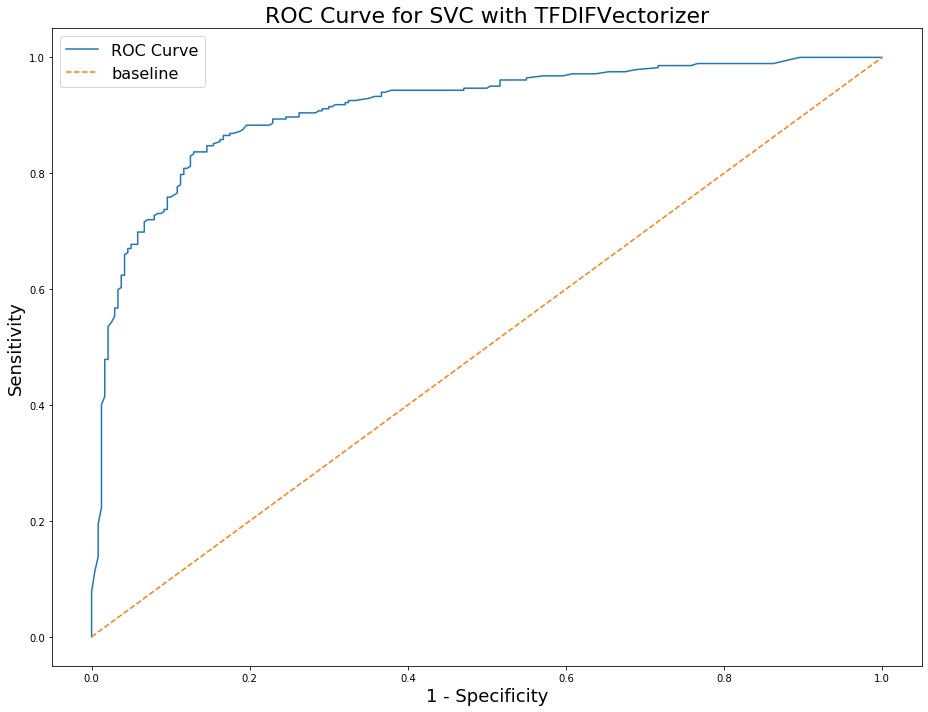

In [94]:
roc(gs_svc_tvec, 
    X_test, 
    y_test, 
    svc_tvec_pred, 
    'ROC Curve for SVC with TFDIFVectorizer', 
    'ROC Curve for SVC with TFDIFVectorizer')

It appears that the TFIDFVectorizer optimizes for low false negative values as it apperas the confusion matrix has flipped. The amount of true positives has increased while the true negatives have decreased. The ROC Curve area has decreased slightly when compared to the CountVectorizer Variant but overall the accuracy along with the other metrics appears to be a decent model. It falls a little short of its CountVectorizer variant as being that appears to be the best model.

## Conclusion and Recommendations

---

[Top](#Table-of-Contents)

We choose the Support Vector Machine model using CountVectorizer to be the model of choice. With an accuracy score of 84.9% and a specificity of .867. We wanted to minimize false positives and believed to have achieved our goal. The optimal parameters are: 
    - having a maximum of 2000 features
    - using single words and bigrams together, 
    - utilizing 80% of the features,
    - minimum number of data is 2
    - the degree of polynomial for the SVC model is 1
    - the penalty parameter for the SVC model is 1
    
These combination of parameters will yeild us the optimal result for accuracy and provide us with a very workable model to predict which posts belong to which forum. Another trend we seem to notice is that the CountVectorizer transformer appears to optimize for the false positives while the TFIDFVectorizer optmizes for false negatives. This could be help in future model if we are trying to optimize or minimize false positives/negatives, we can focus specifically on one of the transformers. This model however, is not perfect. This model would fall short on explain which feature would contribute the most to being a predictor to the forums. Because the model is a black box setting, we can only say it was a good model but cannot conclusive say why. This is similar to the Lasso and Ridge models for continuous value targets where we have to apply a standardizing transformation which will cause us to lose interpretation of the features as a trade-off to get a better model. 

We believe that our model could have improve if users wrote every post without slangs. It is highly unlikely NLP tools such as lemmatizers and stemming will understand the presense of slangs. If every post were written in grammatically correct English, it might improve our model. In addition, some posts were too short and cost us a reddit pull. Shorter posts means less data for the model to correlate why that particular post belongs in their assigned forum. If we would filter the size of posts pulled and only keep the long post from Reddit, the model could improve. We understand that we could truncate the data after we create the dataframe of all shorter posts. But that would decrease the size of our dataset and increase bias. 

We hope our instructor would be satisfy with the outcome of the model and hope he is able to better differentiate the difference in posts from their respective forums as well as our model.